In [1]:
#!pip install wordcloud

In [2]:
#!pip install spacy

In [3]:
import spacy

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Documents/UNT NLP Course/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [35]:
hotel=pd.read_csv("tripadvisor_hotel_reviews.csv")
hotel.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy n...",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroo...",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book medit...",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless interne...",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language ...",5


In [5]:
#!pip install --upgrade xarray

In [4]:
#!pip install plotly

In [36]:
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten,Dropout,Embedding
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re

pd.set_option('max_colwidth', 400)

In [130]:
def unique_words(word,rating=None):
    words=[]
    stopwords=set(STOPWORDS)
    some_more_common_words=set([' t ',' n '])
    stopwords.update(some_more_common_words)
    copy=hotel['Review']
    if rating!=None:
        copy=hotel[hotel['Rating']==rating]['Review']
    for y in copy:
        s=y.split(" ")
        for x in s:
            if x.isalpha() and x not in stopwords:
                words.append(x)
    return np.array(Counter(words).most_common(word))

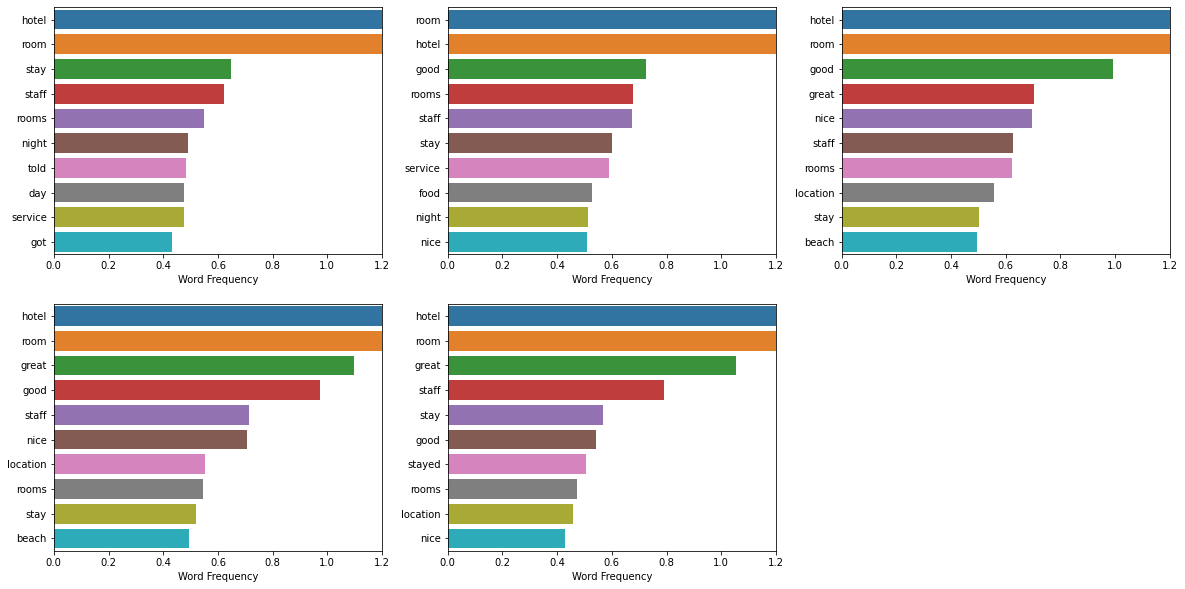

In [131]:
fig=plt.figure(figsize=(20,10))
counts=Counter(hotel['Rating'])
for rating in range(1,6):
    rated=unique_words(word=10,rating=rating)
    plt.subplot(2,3,rating)
    plt.xlabel('Word Frequency')
    plt.xlim([0,1.2])
    sns.barplot(y=rated[:,0],x=rated[:,1].astype(int)/counts[rating])
plt.show()

In [132]:
s=set()
stop=set(STOPWORDS)
lemma=WordNetLemmatizer()
for x in hotel['Review']:
    x=re.sub('[^A-Za-z]'," ",x)
    x=x.split(" ")
    for w in x:
        w=lemma.lemmatize(w)
        if w not in stop:
            s.add(w)
len(s)#number of distinct words

44760

In [133]:
def lemmatizer(x):
    x=re.sub('[^A-Za-z]',' ',x)
    s=x.split(" ")
    h=[]
    for y in s:
        y=lemma.lemmatize(y)
        if y not in stop:
            h.append(y)
    return " ".join(h)      

In [134]:
hotel['lemm_text']=hotel['Review'].apply(lambda x: lemmatizer(x))

In [135]:
hotel.head()

display(hotel['lemm_text'])

0        nice hotel expensive parking got good deal stay hotel anniversary  arrived late evening took advice previous review valet parking  check quick easy  little disappointed non existent view room room clean nice size  bed comfortable woke stiff neck high pillow  soundproof heard music room night morning loud bang door opening closing hear people talking hallway  maybe noisy neighbor  aveda bath pr...
1        ok nothing special charge diamond member hilton decided chain shot   th anniversary seattle  start booked suite paid extra website description  suite bedroom bathroom standard hotel room  took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast  got kidding  embassy suit sitting room bathroom bedroom unlike kim...
2        nice room    experience hotel monaco seattle good hotel n t    level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives

In [136]:
num_words=20000
tokenizer=Tokenizer(num_words=num_words,oov_token='OOV')
tokenizer.fit_on_texts(hotel['lemm_text'])
tokenized_text=tokenizer.texts_to_sequences(hotel['lemm_text'])
np.mean([len(x) for x in tokenized_text])

99.82797325655166

In [137]:
length=100
tokenized_text=pad_sequences(tokenized_text,length,padding='post',truncating='post')
output=to_categorical(hotel['Rating'])
output=output[:,1:]

## Explore NlP Text get word frequency

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# test dataframe
df = pd.DataFrame({'lemmatized': ['se be me','se me lo', 'caca']})
df

,lemmatized
0,se be me
1,se me lo
2,caca


In [139]:

# use explode to expand the lists into separate rows
dfe = df.lemmatized.explode().to_frame().reset_index(drop=True)

# groupby the values in the column, get the count and sort
dfg = dfe.groupby('lemmatized').lemmatized.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

display(dfg)

,lemmatized,count
0,caca,1
1,se be me,1
2,se me lo,1


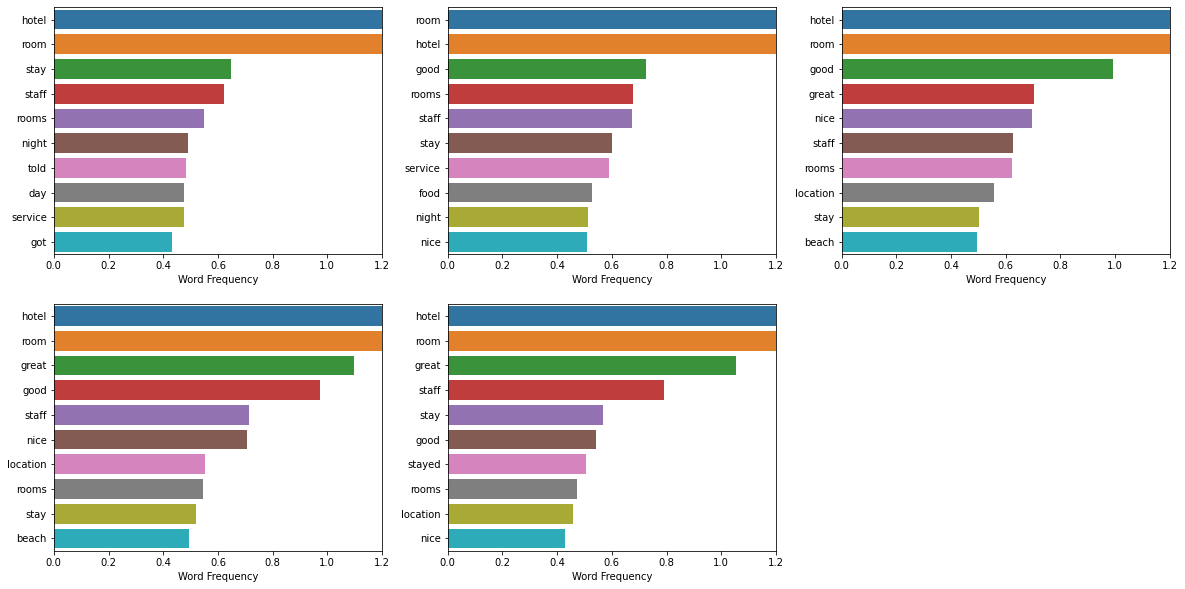

In [140]:
'''
# use explode to expand the lists into separate rows
hotel_dfe = hotel.lemm_text.explode().to_frame().reset_index(drop=True)

# groupby the values in the column, get the count and sort
hotel_dfg = hotel_dfe.groupby('lemm_text').lemm_text.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

display(hotel_dfg)

'''


fig=plt.figure(figsize=(20,10))
counts=Counter(hotel['Rating'])
for rating in range(1,6):
    rated=unique_words(word=10,rating=rating)
    plt.subplot(2,3,rating)
    plt.xlabel('Word Frequency')
    plt.xlim([0,1.2])
    sns.barplot(y=rated[:,0],x=rated[:,1].astype(int)/counts[rating])
plt.show()

In [141]:
h=hotel

h['count']=hotel['lemm_text'].str.count(' ') + 1
h.head()

,Review,Rating,lemm_text,count
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy n...",4,nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath pr...,96
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroo...",2,ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast got kidding embassy suit sitting room bathroom bedroom unlike kim...,274
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book medit...",3,nice room experience hotel monaco seattle good hotel n t level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch n t provide guidance special request tv hard use ipod sound dock suite non functioning decided book mediterranean sui...,263
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless interne...",5,unique great stay wonderful time hotel monaco location excellent short stroll main downtown shopping area pet friendly room showed sign animal hair smell monaco suite sleeping area big striped curtain pulled closed nice touch felt cosy goldfish named brandi enjoyed n t partake free wine coffee tea service lobby thought great feature great staff friendly free wireless internet hotel wo...,103
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language ...",5,great stay great stay went seahawk game awesome downfall view building n t complain room huge staff helpful booked hotel website seahawk package charge parking got voucher taxi problem taxi driver n t want accept voucher barely spoke english funny thing speak arabic called started making comment girlfriend cell phone buddy took second realize said fact spea

In [142]:
#Get unique words

unique = set(df['lemmatized'].str.lower().str.findall("\w+").sum())

In [143]:
unique

{'be', 'caca', 'lo', 'me', 'se'}

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [144]:
from collections import Counter
from itertools import chain

counter = Counter(chain.from_iterable(map(str.split, hotel.lemm_text.tolist()))) 

In [145]:
series = pd.Series(counter).sort_values(ascending=False)
series

hotel       54050
room        47779
great       21485
t           19565
n           19112
            ...  
moyen           1
appeard         1
gorgeors        1
seem            1
swears          1
Length: 44759, dtype: int64

In [146]:
series.iloc[0:20]

hotel         54050
room          47779
great         21485
t             19565
n             19112
good          17491
staff         16706
stay          15601
night         14577
day           13484
time          12981
nice          12647
location      11560
service       10946
beach         10529
stayed        10502
restaurant    10485
breakfast     10135
food           9688
clean          9608
dtype: int64

https://sparkbyexamples.com/pandas/pandas-series-filter/#:~:text=By%20using%20Series.filter%20%28%29%20function%20you%20can%20filter,object%20whose%20index%20label%20name%20has%20a%20space.

In [154]:
# filter() index by labels
ser2 = series.filter(items = ['cost', 'price', 'criminal', 'hooker', 'drugs', 'inside','drug', 'food', 'pool'
                                'service', 'parking', 'space', 'ac', 'location', 'smoking' , 'neighborhood'])
#cost, crime history, amenities, flexibility, parking, indoor facility, room space, air-conditioning, and neighborhood 
print(ser2)

cost             1460
price            4934
criminal           10
hooker              8
inside            661
drug               56
food             9688
parking          1694
space            1301
ac                330
location        11560
smoking           683
neighborhood      513
dtype: int64


<AxesSubplot:title={'center':'Count of Words in Hotel Review'}, ylabel='Count of Words'>

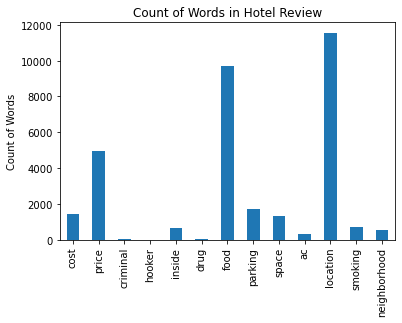

In [165]:
# create the bar plot
ax = ser2.plot(kind='bar')
# rotate xtick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# set the y-axis label
ax.set_ylabel("Count of Words")
# set the title
ax.set_title("Count of Words in Hotel Review")
ser2.plot.bar(x='bar')

<AxesSubplot:xlabel='lemmatized'>

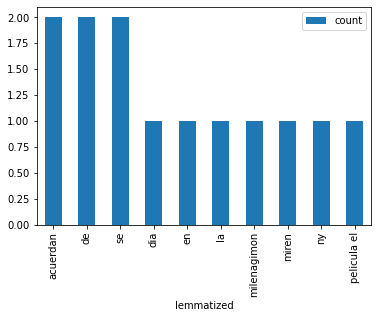

In [71]:


# plot the dataframe
dfg.plot.bar(x='lemmatized')

## Now find most popular word groupings

# bigrams, # trigrams







In [164]:
# Creating a corpus to identify word groupings perform an overall training on the model. 
corpus_hotel = hotel['lemm_text'].str.cat(sep=',')


## We need to generate a TAG column 
Exploring these documents: 

https://www.kaggle.com/code/matleonard/text-classification/notebook

https://www.kaggle.com/code/mihirprajapati01/nlp-assignment

https://stackoverflow.com/questions/2661778/tag-generation-from-a-text-content

SyntaxError: invalid syntax (Temp/ipykernel_21952/3959575968.py, line 1)

In [7]:
'''import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

# change this to read in your data
finder = BigramCollocationFinder.from_words(
   nltk.corpus.genesis.words('english-web.txt'))

# only bigrams that appear 3+ times
finder.apply_freq_filter(3) 

# return the 5 n-grams with the highest PMI
finder.nbest(bigram_measures.pmi, 6)  '''


"import nltk\nfrom nltk.collocations import *\nbigram_measures = nltk.collocations.BigramAssocMeasures()\n\n# change this to read in your data\nfinder = BigramCollocationFinder.from_words(\n   nltk.corpus.genesis.words('english-web.txt'))\n\n# only bigrams that appear 3+ times\nfinder.apply_freq_filter(3) \n\n# return the 5 n-grams with the highest PMI\nfinder.nbest(bigram_measures.pmi, 6)  "

In [15]:
import spacy

# Create an empty model
nlp = spacy.blank("en")

# Add the TextCategorizer to the empty model
textcat = nlp.add_pipe("textcat")

In [16]:
# Add labels to text classifier
textcat.add_label("ham")
textcat.add_label("spam")

1

In [17]:
train_texts = spam['text'].values
train_labels = [{'cats': {'ham': label == 'ham',
                          'spam': label == 'spam'}} 
                for label in spam['label']]

NameError: name 'spam' is not defined

##  Not part of our objective.

## These are the Preparation for Predictions: Keeping for reference to source. 

In [25]:
train,test,y_train,y_test=train_test_split(tokenized_text,output,test_size=0.2,random_state=21)

In [26]:
vector_space=32
model=Sequential()
model.add(Embedding(num_words,vector_space,input_length=length))
model.add(LSTM(16,return_sequences=True,recurrent_dropout=0.2))
model.add(LSTM(16,return_sequences=True,recurrent_dropout=0.2))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5,activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           640000    
                                                                 
 lstm (LSTM)                 (None, 100, 16)           3136      
                                                                 
 lstm_1 (LSTM)               (None, 100, 16)           2112      
                                                                 
 lstm_2 (LSTM)               (None, 32)                6272      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2

In [28]:
epoch=20
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train,y_train,validation_split=0.2,epochs=epoch,batch_size=1000)

Epoch 1/20
14/14 [==============================] - 10s 468ms/step - loss: 1.5676 - accuracy: 0.3965 - val_loss: 1.4449 - val_accuracy: 0.4440
Epoch 2/20
14/14 [==============================] - 6s 416ms/step - loss: 1.3984 - accuracy: 0.4219 - val_loss: 1.3639 - val_accuracy: 0.4440
Epoch 3/20
14/14 [==============================] - 6s 430ms/step - loss: 1.3699 - accuracy: 0.4216 - val_loss: 1.3366 - val_accuracy: 0.4440
Epoch 4/20
14/14 [==============================] - 6s 446ms/step - loss: 1.3450 - accuracy: 0.4338 - val_loss: 1.3186 - val_accuracy: 0.4440
Epoch 5/20
14/14 [==============================] - 6s 461ms/step - loss: 1.2570 - accuracy: 0.4391 - val_loss: 1.1613 - val_accuracy: 0.4474
Epoch 6/20
14/14 [==============================] - 7s 473ms/step - loss: 1.1432 - accuracy: 0.4363 - val_loss: 1.0909 - val_accuracy: 0.4791
Epoch 7/20
14/14 [==============================] - 7s 484ms/step - loss: 1.0674 - accuracy: 0.4804 - val_loss: 1.0535 - val_accuracy: 0.4977
Epoch

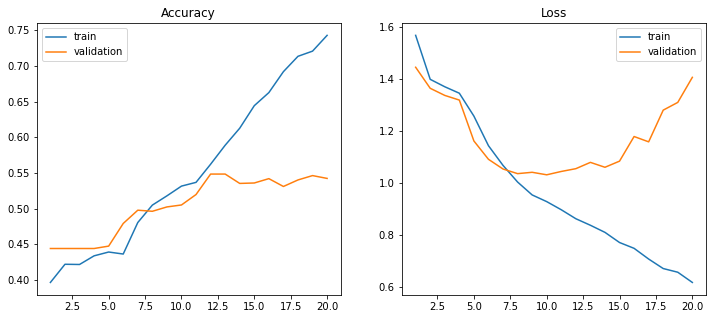

In [29]:
h=history.history
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(range(1,epoch+1),h['accuracy'],label='train')
plt.plot(range(1,epoch+1),h['val_accuracy'],label='validation')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(range(1,epoch+1),h['loss'],label='train')
plt.plot(range(1,epoch+1),h['val_loss'],label='validation')
plt.legend()
plt.show()

In [30]:
train,test,y_train,y_test=train_test_split(tokenized_text,df['Rating'],test_size=0.2,random_state=21)

In [31]:
model=Sequential()
model.add(Embedding(num_words,vector_space,input_length=length))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='relu'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           640000    
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 256)               8448      
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 657,025
Trainable params: 657,025
Non-trainable params: 0
_________________________________________________________________


In [33]:
epoch=20
model.compile(optimizer='Adam',loss='mse',metrics='mae')
history=model.fit(train,y_train,epochs=epoch,batch_size=250,validation_split=0.2)

Epoch 1/20
53/53 [==============================] - 5s 68ms/step - loss: 6.4083 - mae: 2.0110 - val_loss: 1.5137 - val_mae: 0.9320
Epoch 2/20
53/53 [==============================] - 3s 63ms/step - loss: 1.4959 - mae: 0.9594 - val_loss: 1.4439 - val_mae: 0.9512
Epoch 3/20
53/53 [==============================] - 3s 63ms/step - loss: 1.4527 - mae: 0.9472 - val_loss: 1.4236 - val_mae: 0.9388
Epoch 4/20
53/53 [==============================] - 3s 62ms/step - loss: 1.3517 - mae: 0.9110 - val_loss: 1.0869 - val_mae: 0.8455
Epoch 5/20
53/53 [==============================] - 3s 63ms/step - loss: 0.8298 - mae: 0.7273 - val_loss: 0.7460 - val_mae: 0.6950
Epoch 6/20
53/53 [==============================] - 3s 63ms/step - loss: 0.5783 - mae: 0.6212 - val_loss: 0.6705 - val_mae: 0.6749
Epoch 7/20
53/53 [==============================] - 3s 63ms/step - loss: 0.4651 - mae: 0.5596 - val_loss: 0.7052 - val_mae: 0.6500
Epoch 8/20
53/53 [==============================] - 3s 63ms/step - loss: 0.4046 - m

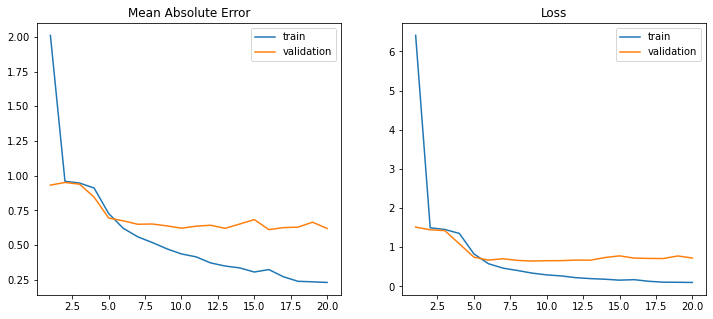

In [34]:
h=history.history
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Mean Absolute Error')
plt.plot(range(1,epoch+1),h['mae'],label='train')
plt.plot(range(1,epoch+1),h['val_mae'],label='validation')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(range(1,epoch+1),h['loss'],label='train')
plt.plot(range(1,epoch+1),h['val_loss'],label='validation')
plt.legend()
plt.show()

In [35]:
def get_preds(data,true_labels):
    pred=model.predict(data)
    h=[]
    for x in pred:
        if x-int(x)>=0.5:
            h.append(np.ceil(x))
        else :
            h.append(np.floor(x))
    print(pred[0:5])
    print(true_labels[:5])
    return accuracy_score(h,true_labels)

In [36]:
get_preds(train,y_train)

[[4.075413 ]
 [4.7228527]
 [2.112603 ]
 [4.053693 ]
 [3.9605172]]
10294    4
11753    5
16362    2
7074     4
14058    4
Name: Rating, dtype: int64


0.835285505124451

In [37]:
get_preds(test,y_test)

[[3.7904174]
 [4.4888306]
 [4.9037666]
 [4.790903 ]
 [4.300141 ]]
955      3
19500    5
19157    5
17671    5
17723    5
Name: Rating, dtype: int64


0.5279336423517931